In [1]:
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics
import sklearn

In [2]:
labels_df = pd.read_csv('../stats/all-labels.csv')
display(labels_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1
...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0


In [3]:
joon_preds = pd.read_csv('../stats/sync-vid-preds-211115-2044.csv')
joon_preds = joon_preds.groupby('filename', sort=False, as_index=False).agg(min)
joon_preds = pd.merge(
    left=labels_df, right=joon_preds, 
    left_on='filename', right_on='filename'
)

joon_preds['diff'] = joon_preds['mean_pred'] - joon_preds['median_pred']
display(joon_preds)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,face_no,diff
0,18351609de111566.mp4,1,0.0,0.0,1,0,12.825241,13.171495,9.604192,14.841698,0,-0.346254
1,5026338ed12800bc.mp4,1,0.0,0.0,1,0,12.226965,12.586184,9.006733,14.791941,0,-0.359219
2,5968740ef3396f0c.mp4,1,0.0,0.0,1,0,12.619064,12.806955,9.320196,14.131991,0,-0.187891
3,50e301013618719d.mp4,1,0.0,0.0,1,0,13.723406,13.448393,11.882830,15.546733,0,0.275013
4,bc6dd15cfdfe6175.mp4,1,0.0,0.0,1,0,13.020068,12.643965,10.748637,15.424719,0,0.376103
...,...,...,...,...,...,...,...,...,...,...,...,...
394,951ee63325b9c303.mp4,0,0.0,0.0,0,0,12.421661,13.052989,9.590781,15.430199,0,-0.631328
395,2ffa046041106046.mp4,0,0.0,0.0,0,0,11.785560,11.611810,9.470455,13.838875,0,0.173750
396,2810f7be925ccbfc.mp4,0,0.0,0.0,0,0,14.275546,14.084501,11.742726,17.004413,0,0.191045
397,8dbb4de72c27723a.mp4,0,0.0,0.0,0,0,10.553819,9.647387,8.541011,13.345322,0,0.906432


In [13]:
X = joon_preds[['mean_pred', 'median_pred', '1st_quartile_pred', '3rd_quartile_pred']]
X = X.to_numpy()
Y = joon_preds['label'].to_numpy(dtype=float)

indexes = np.arange(len(X))
np.random.shuffle(indexes)
# X = X[indexes]
# Y = Y[indexes]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=69
)
print(y_train)

[0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 1.]


0.9348432074328801 0.9600476763257426


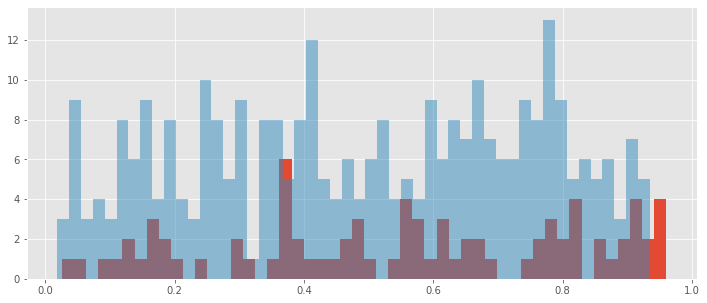

In [119]:
clf = LogisticRegression(random_state=42, multi_class='ovr').fit(X_train, y_train)
y_train_pred = clf.predict_proba(X_train)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]
# print(y_pred)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.hist(y_test_pred, bins=50)
plt.hist(y_train_pred, bins=50, alpha=0.5)
print(max(y_train_pred), max(y_test_pred))

In [121]:
import pickle
pickle.dump(clf, open('logistic-sync.sav', 'wb'))

In [127]:
loaded_model = pickle.load(open('logistic-sync.sav', 'rb'))
test_train_pred = clf.predict_proba(X_train)[:, 1]

print(X_train)
print((test_train_pred == y_train_pred).all())
print(test_train_pred)

[[11.833433   11.378614    9.04309106 14.21893477]
 [13.484006   12.937349   10.78309989 16.05735683]
 [13.020068   12.643965   10.74863672 15.42471862]
 ...
 [12.845477   12.959665   10.20103502 15.01509023]
 [11.386145   10.764408    7.82871139 14.44084907]
 [12.4424095  12.27017     9.66295171 14.86856699]]
True
[0.20771367 0.72481826 0.56303839 0.12254592 0.7846974  0.08098527
 0.07503015 0.73937802 0.36107869 0.62415991 0.40677273 0.30808385
 0.66019227 0.59677387 0.39017665 0.26447889 0.79009742 0.70084761
 0.46585599 0.21768476 0.77700171 0.11302311 0.87264181 0.73705484
 0.02874059 0.147435   0.59133282 0.73662776 0.44966858 0.26720214
 0.38775684 0.8097209  0.76082108 0.90686829 0.79579547 0.69282408
 0.52906525 0.16270498 0.74503934 0.14124287 0.49935879 0.92163512
 0.19330597 0.1489276  0.29669214 0.77271066 0.4081895  0.50353346
 0.52956205 0.40998974 0.51464242 0.49738513 0.68217122 0.04847387
 0.12584518 0.3819314  0.63374255 0.04916886 0.60361228 0.74546539
 0.64253423 0

In [58]:
from scipy.stats import norm, skewnorm

0.630653120220199
-1514588.0723685771 0.929695350927477 0.36272701125332163
0.04203656368364173 0.9296943591351875


(array([ 2.,  2.,  0.,  3.,  0.,  2.,  1.,  2.,  6.,  1.,  2.,  3.,  1.,
         4.,  5.,  2.,  4.,  9., 13., 11., 10., 10., 14., 10., 15., 13.,
        12., 14., 16., 19., 18., 24., 22., 22., 24., 24., 22., 22., 30.,
        30., 32., 24., 25., 18., 24., 16.,  5.,  5.,  3.,  4.]),
 array([-0.09963128, -0.07703606, -0.05444084, -0.03184563, -0.00925041,
         0.01334481,  0.03594002,  0.05853524,  0.08113046,  0.10372568,
         0.12632089,  0.14891611,  0.17151133,  0.19410654,  0.21670176,
         0.23929698,  0.26189219,  0.28448741,  0.30708263,  0.32967785,
         0.35227306,  0.37486828,  0.3974635 ,  0.42005871,  0.44265393,
         0.46524915,  0.48784437,  0.51043958,  0.5330348 ,  0.55563002,
         0.57822523,  0.60082045,  0.62341567,  0.64601089,  0.6686061 ,
         0.69120132,  0.71379654,  0.73639175,  0.75898697,  0.78158219,
         0.8041774 ,  0.82677262,  0.84936784,  0.87196306,  0.89455827,
         0.91715349,  0.93974871,  0.96234392,  0.98493914,

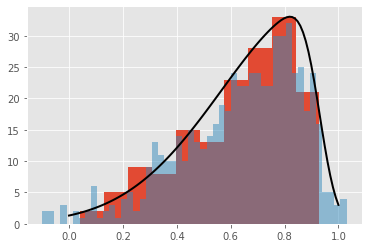

In [109]:
true_swap_preds = y_train_pred * y_train
true_swap_preds = true_swap_preds[true_swap_preds != 0]
print(np.mean(true_swap_preds))
plt.hist(true_swap_preds)

ae, loce, scalee = skewnorm.fit(true_swap_preds)
x = np.linspace(0, 1, 100)
p = skewnorm.pdf(x, -7, loce, scalee) * 16
plt.plot(x, p, 'k', linewidth=2)
print(ae, loce, scalee)
print(min(true_swap_preds), max(true_swap_preds))

distribution = skewnorm(a=-7, loc=loce, scale=scalee)
values = distribution.rvs(size=600)
plt.hist(values, bins=50, alpha=0.5)

35.21634779387893 0.02969941766576356 0.39949649993453307


(array([ 3.,  5.,  7., 11., 18., 29., 26., 29., 28., 17., 34., 30., 22.,
        36., 26., 19., 18., 20., 24., 26., 18., 19., 18., 15., 14., 12.,
        15.,  4.,  4.,  8.,  8.,  9.,  5.,  4.,  4.,  2.,  0.,  1.,  1.,
         0.,  3.,  0.,  2.,  2.,  1.,  0.,  2.,  0.,  0.,  1.]),
 array([-0.08552851, -0.05884047, -0.03215242, -0.00546437,  0.02122367,
         0.04791172,  0.07459976,  0.10128781,  0.12797585,  0.1546639 ,
         0.18135194,  0.20803999,  0.23472803,  0.26141608,  0.28810412,
         0.31479217,  0.34148022,  0.36816826,  0.39485631,  0.42154435,
         0.4482324 ,  0.47492044,  0.50160849,  0.52829653,  0.55498458,
         0.58167262,  0.60836067,  0.63504871,  0.66173676,  0.68842481,
         0.71511285,  0.7418009 ,  0.76848894,  0.79517699,  0.82186503,
         0.84855308,  0.87524112,  0.90192917,  0.92861721,  0.95530526,
         0.9819933 ,  1.00868135,  1.0353694 ,  1.06205744,  1.08874549,
         1.11543353,  1.14212158,  1.16880962,  1.19549767,

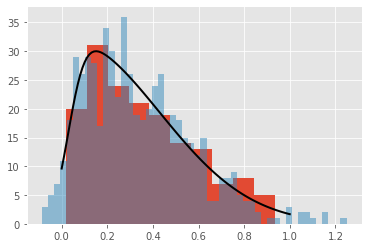

In [117]:
true_real_preds = y_train_pred * (1 - y_train)
true_real_preds = true_real_preds[true_real_preds != 0]
plt.hist(true_real_preds)

ae, loce, scalee = skewnorm.fit(true_real_preds)
x = np.linspace(0, 1, 100)
p = skewnorm.pdf(x, 7, loce, scalee) * 16
plt.plot(x, p, 'k', linewidth=2)
print(ae, loce, scalee)

distribution = skewnorm(a=7, loc=loce, scale=scalee)
values = distribution.rvs(size=600)
plt.hist(values, bins=50, alpha=0.5)

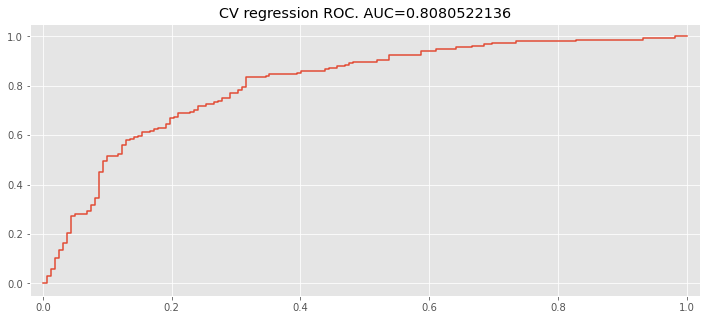

In [20]:
clip = -270
fpr, tpr, _ = sklearn.metrics.roc_curve(y_train, y_train_pred)
auc = sklearn.metrics.roc_auc_score(y_train, y_train_pred)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("CV regression ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

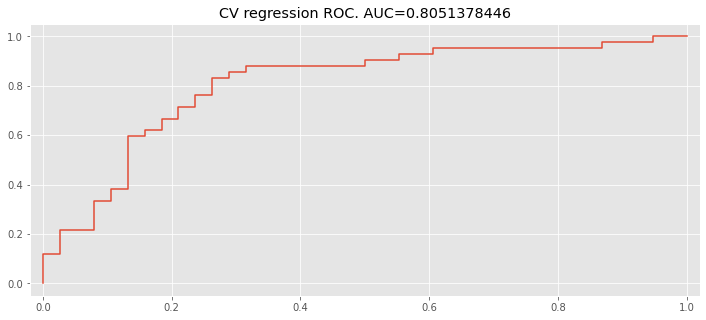

In [19]:
clip = -270
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_test_pred)
auc = sklearn.metrics.roc_auc_score(y_test, y_test_pred)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("CV regression ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)